<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Chapter%203/Question%203/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..

In [1]:
import os

# Define the folder name
folder_name = "Data"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd Data

/content/Data


In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1xzfOpzTwMv73HPmV3QbpuplYVptiG0cK


  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=1xzfOpzTwMv73HPmV3QbpuplYVptiG0cK
From (redirected): https://drive.google.com/uc?id=1xzfOpzTwMv73HPmV3QbpuplYVptiG0cK&confirm=t&uuid=f884864c-b29c-41eb-8533-86c892fbd360
To: /content/Data/archive.zip
100% 69.2M/69.2M [00:02<00:00, 34.3MB/s]


In [3]:
!unzip '/content/Data/archive.zip' -d '/content/Data/archive'


Archive:  /content/Data/archive.zip
  inflating: /content/Data/archive/creditcard.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Data/archive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
X = df.drop(['Time', 'Class'], axis=1).values
y = df['Class'].values

Text(0, 0.5, 'Frequency')

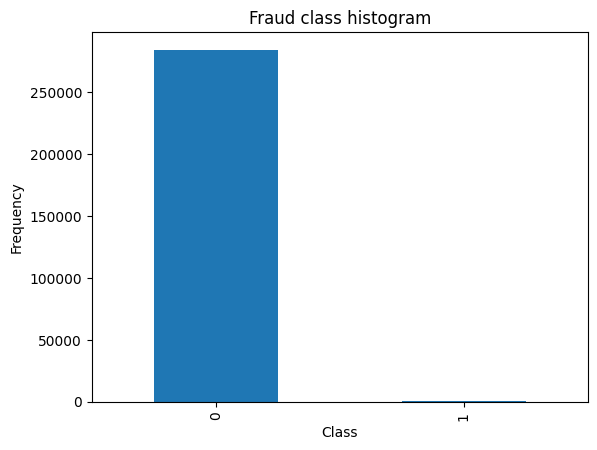

In [26]:
count_classes = pd.value_counts(df['Class'], sort = False)

count_classes.plot (kind='bar')
plt.title ("Fraud class histogram")
plt.xlabel ("Class")
plt.ylabel ("Frequency")

Text(0, 0.5, 'Frequency')

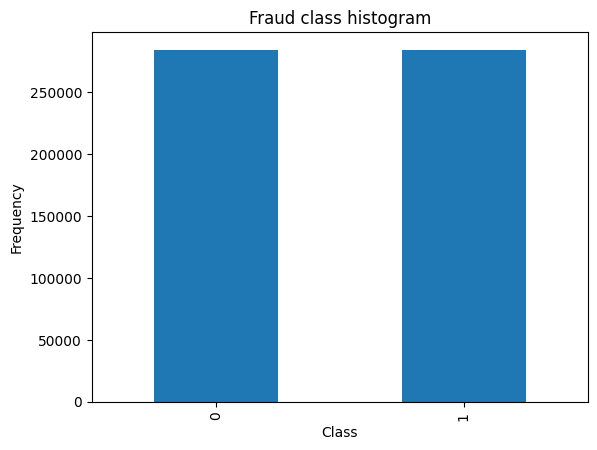

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=76)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=df.columns[1:-1])
df_resampled['Class'] = y_resampled

count_classes = pd.value_counts(df_resampled['Class'], sort = False)

count_classes.plot (kind='bar')
plt.title ("Fraud class histogram")
plt.xlabel ("Class")
plt.ylabel ("Frequency")

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=76, stratify=y_resampled)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
noise_factor = 0.1
X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

Epoch 1/50
723/728 [============================>.] - ETA: 0s - loss: 0.8892
Epoch 1: val_loss improved from inf to 0.82545, saving model to best_autoencoder.h5
728/728 [==============================] - 4s 3ms/step - loss: 0.8888 - val_loss: 0.8254
Epoch 2/50
 72/728 [=>............................] - ETA: 1s - loss: 0.8108

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


725/728 [============================>.] - ETA: 0s - loss: 0.8227
Epoch 2: val_loss improved from 0.82545 to 0.80578, saving model to best_autoencoder.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.8226 - val_loss: 0.8058
Epoch 3/50
720/728 [============================>.] - ETA: 0s - loss: 0.8015
Epoch 3: val_loss improved from 0.80578 to 0.79294, saving model to best_autoencoder.h5
728/728 [==============================] - 3s 5ms/step - loss: 0.8018 - val_loss: 0.7929
Epoch 4/50
709/728 [============================>.] - ETA: 0s - loss: 0.7953
Epoch 4: val_loss improved from 0.79294 to 0.78554, saving model to best_autoencoder.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.7947 - val_loss: 0.7855
Epoch 5/50
721/728 [============================>.] - ETA: 0s - loss: 0.7853
Epoch 5: val_loss improved from 0.78554 to 0.77167, saving model to best_autoencoder.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.7852 - val_loss: 0.

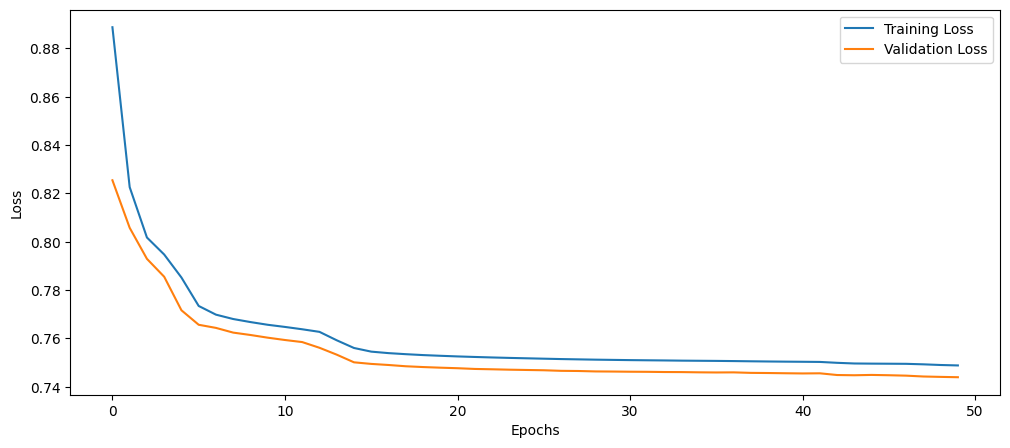

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score, accuracy_score

input_dim = X_train_noisy.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder = Dense(22, activation="relu")(input_layer)
encoder = Dense(15, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)

decoder = Dense(15, activation="relu")(encoder)
decoder = Dense(22, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

model_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_ae = autoencoder.fit(X_train_noisy, X_train_scaled,
                             epochs=50,
                             batch_size=500,
                             shuffle=True,
                             validation_split=0.2,
                             callbacks=[model_checkpoint,early_stopping])

autoencoder.load_weights('best_autoencoder.h5')

X_train_denoised = autoencoder.predict(X_train_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(12, 5))
plt.plot(history_ae.history['loss'], label='Train Loss')
plt.plot(history_ae.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Epoch 1/50
721/728 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9228
Epoch 1: val_loss improved from inf to 0.15119, saving model to best_classifier.h5
728/728 [==============================] - 3s 3ms/step - loss: 0.2118 - accuracy: 0.9230 - val_loss: 0.1512 - val_accuracy: 0.9456
Epoch 2/50
 68/728 [=>............................] - ETA: 1s - loss: 0.1522 - accuracy: 0.9461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


728/728 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9480
Epoch 2: val_loss improved from 0.15119 to 0.13804, saving model to best_classifier.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.1431 - accuracy: 0.9480 - val_loss: 0.1380 - val_accuracy: 0.9495
Epoch 3/50
722/728 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9508
Epoch 3: val_loss improved from 0.13804 to 0.13036, saving model to best_classifier.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.1332 - accuracy: 0.9508 - val_loss: 0.1304 - val_accuracy: 0.9523
Epoch 4/50
727/728 [============================>.] - ETA: 0s - loss: 0.1280 - accuracy: 0.9524
Epoch 4: val_loss improved from 0.13036 to 0.12503, saving model to best_classifier.h5
728/728 [==============================] - 2s 3ms/step - loss: 0.1280 - accuracy: 0.9524 - val_loss: 0.1250 - val_accuracy: 0.9530
Epoch 5/50
720/728 [============================>.] - ETA: 0s - loss:

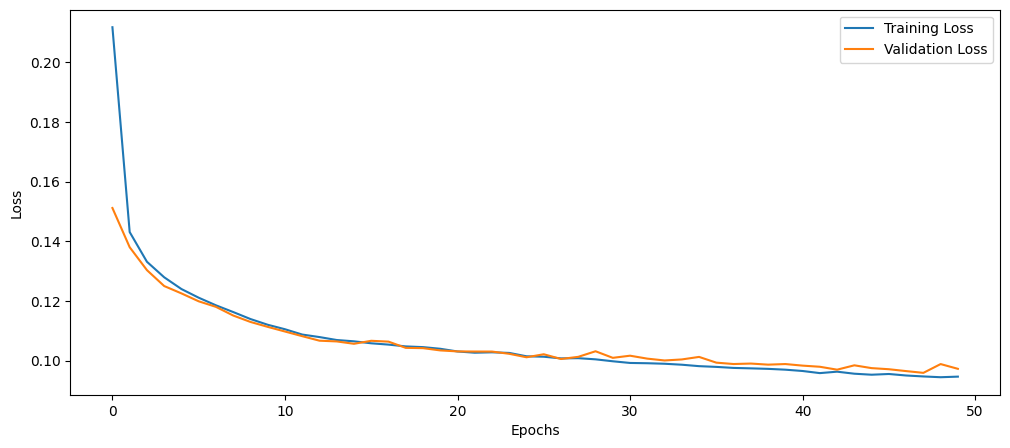

In [38]:
input_layer = Input(shape=(input_dim,))
classifier = Dense(22, activation="relu")(input_layer)
classifier = Dense(15, activation="relu")(classifier)
classifier = Dense(10, activation="relu")(classifier)
classifier = Dense(5, activation="relu")(classifier)
classifier = Dense(2, activation="softmax")(classifier)

classifier_model = Model(inputs=input_layer, outputs=classifier)
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_checkpoint_classifier = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, verbose=1)

history_clf = classifier_model.fit(X_train_denoised, y_train,
                                   epochs=50,
                                   batch_size=500,
                                   shuffle=True,
                                   validation_split=0.2,
                                   callbacks=[model_checkpoint_classifier])

classifier_model.load_weights('best_classifier.h5')

y_pred = classifier_model.predict(X_test_denoised)
y_pred_classes = np.argmax(y_pred, axis=1)

rscore_1 = r2_score(y_test, y_pred_classes)
print("R2 Score: ", rscore_1)

plt.figure(figsize=(12, 5))
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Accuracy: 0.96


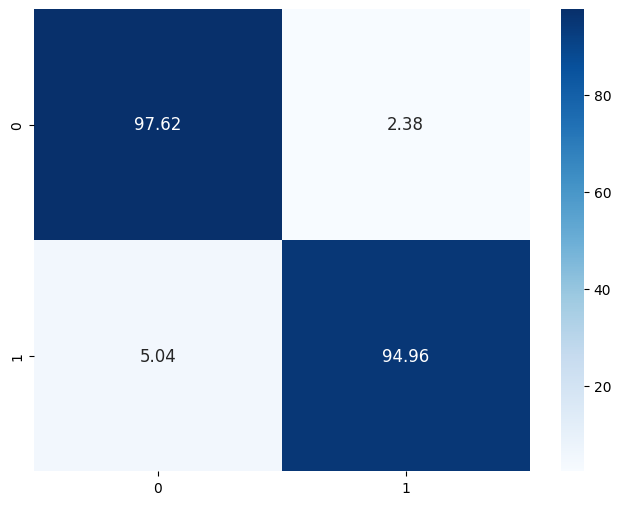

In [39]:

cf_matrix = confusion_matrix(y_test, y_pred_classes)
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:\n", class_report)

precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sampling Strategy: 0.01
Epoch 1/50
716/718 [============================>.] - ETA: 0s - loss: 1.0209
Epoch 1: val_loss improved from inf to 0.97701, saving model to best_autoencoder_0.01.h5
718/718 [==============================] - 3s 3ms/step - loss: 1.0201 - val_loss: 0.9770
Epoch 2/50
 72/718 [==>...........................] - ETA: 1s - loss: 0.9771

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


702/718 [============================>.] - ETA: 0s - loss: 0.9801
Epoch 2: val_loss improved from 0.97701 to 0.93909, saving model to best_autoencoder_0.01.h5
718/718 [==============================] - 2s 2ms/step - loss: 0.9775 - val_loss: 0.9391
Epoch 3/50
710/718 [============================>.] - ETA: 0s - loss: 0.9481
Epoch 3: val_loss improved from 0.93909 to 0.92352, saving model to best_autoencoder_0.01.h5
718/718 [==============================] - 2s 3ms/step - loss: 0.9482 - val_loss: 0.9235
Epoch 4/50
713/718 [============================>.] - ETA: 0s - loss: 0.9344
Epoch 4: val_loss improved from 0.92352 to 0.91770, saving model to best_autoencoder_0.01.h5
718/718 [==============================] - 2s 3ms/step - loss: 0.9340 - val_loss: 0.9177
Epoch 5/50
705/718 [============================>.] - ETA: 0s - loss: 0.9323
Epoch 5: val_loss improved from 0.91770 to 0.91498, saving model to best_autoencoder_0.01.h5
718/718 [==============================] - 3s 4ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1048/1067 [============================>.] - ETA: 0s - loss: 0.8893
Epoch 2: val_loss improved from 0.90054 to 0.89341, saving model to best_autoencoder_0.5.h5
1067/1067 [==============================] - 3s 2ms/step - loss: 0.8887 - val_loss: 0.8934
Epoch 3/50
1050/1067 [============================>.] - ETA: 0s - loss: 0.8823
Epoch 3: val_loss improved from 0.89341 to 0.88027, saving model to best_autoencoder_0.5.h5
1067/1067 [==============================] - 3s 3ms/step - loss: 0.8819 - val_loss: 0.8803
Epoch 4/50
1061/1067 [============================>.] - ETA: 0s - loss: 0.8692
Epoch 4: val_loss improved from 0.88027 to 0.87415, saving model to best_autoencoder_0.5.h5
1067/1067 [==============================] - 3s 2ms/step - loss: 0.8691 - val_loss: 0.8741
Epoch 5/50
1062/1067 [============================>.] - ETA: 0s - loss: 0.8656
Epoch 5: val_loss improved from 0.87415 to 0.87236, saving model to best_autoencoder_0.5.h5
1067/1067 [==============================] - 3s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1412/1422 [============================>.] - ETA: 0s - loss: 0.8202
Epoch 2: val_loss improved from 0.81997 to 0.80321, saving model to best_autoencoder_1.0.h5
1422/1422 [==============================] - 5s 3ms/step - loss: 0.8198 - val_loss: 0.8032
Epoch 3/50
1416/1422 [============================>.] - ETA: 0s - loss: 0.8012
Epoch 3: val_loss improved from 0.80321 to 0.78565, saving model to best_autoencoder_1.0.h5
1422/1422 [==============================] - 4s 3ms/step - loss: 0.8010 - val_loss: 0.7857
Epoch 4/50
1402/1422 [============================>.] - ETA: 0s - loss: 0.7851
Epoch 4: val_loss improved from 0.78565 to 0.76568, saving model to best_autoencoder_1.0.h5
1422/1422 [==============================] - 4s 3ms/step - loss: 0.7849 - val_loss: 0.7657
Epoch 5/50
1415/1422 [============================>.] - ETA: 0s - loss: 0.7652
Epoch 5: val_loss improved from 0.76568 to 0.75702, saving model to best_autoencoder_1.0.h5
1422/1422 [==============================] - 4s 3ms/st

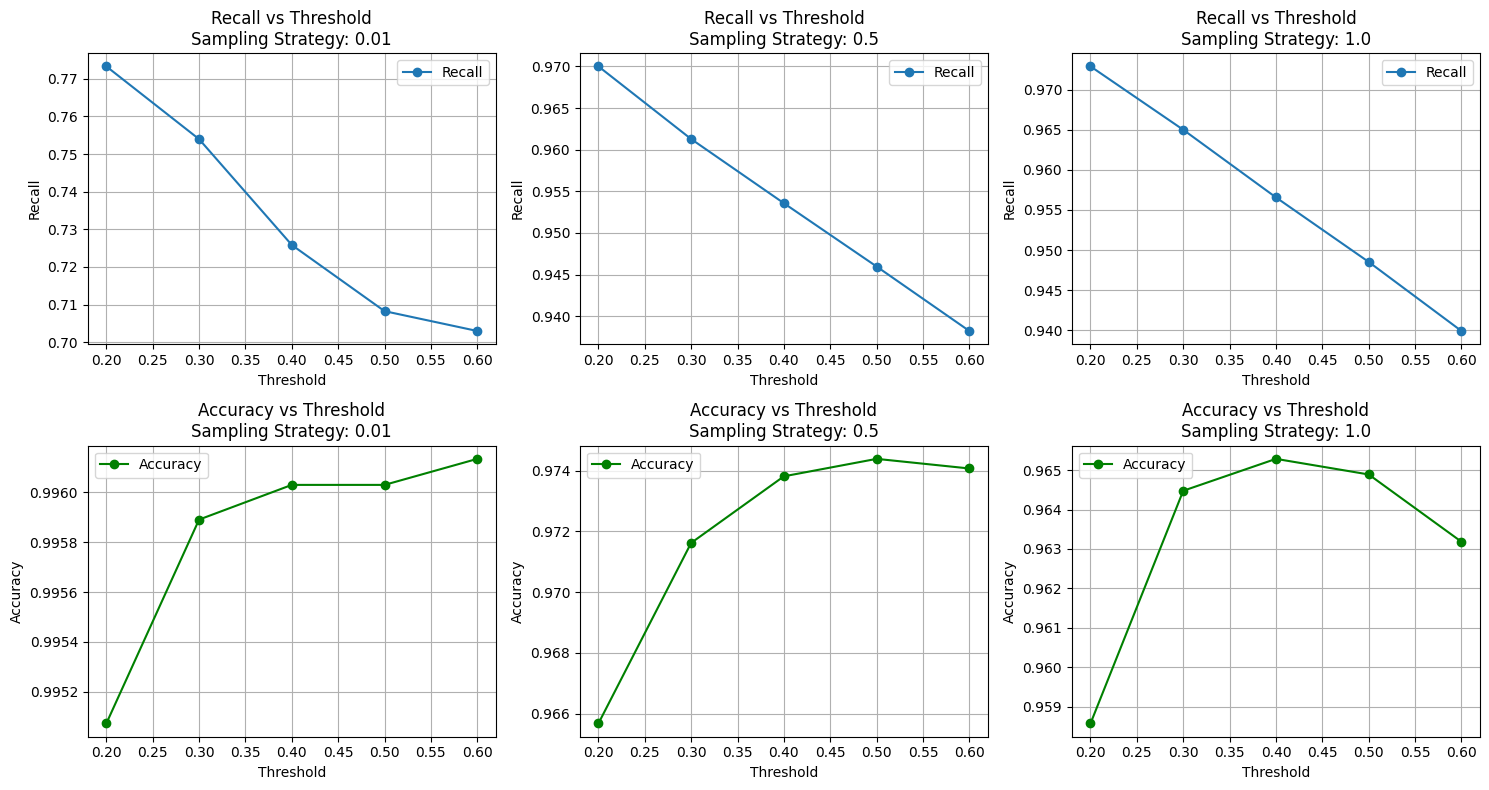

In [41]:
sampling_strategies = [0.01, 0.5, 1.0]
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

all_recall_scores = []
all_accuracy_scores = []

for strategy in sampling_strategies:
    print(f"Sampling Strategy: {strategy}")

    smote = SMOTE(sampling_strategy=strategy, random_state=76)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=76, stratify=y_resampled)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    noise_factor = 0.1
    X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)

    input_dim = X_train_noisy.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(22, activation="relu")(input_layer)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)

    decoder = Dense(15, activation="relu")(encoder)
    decoder = Dense(22, activation="relu")(decoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    model_checkpoint = ModelCheckpoint(f'best_autoencoder_{strategy}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    history_ae = autoencoder.fit(X_train_noisy, X_train_scaled,
                                 epochs=50,
                                 batch_size=256,
                                 shuffle=True,
                                 validation_split=0.2,
                                 callbacks=[model_checkpoint])

    autoencoder.load_weights(f'best_autoencoder_{strategy}.h5')

    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    input_layer = Input(shape=(input_dim,))
    classifier = Dense(22, activation="relu")(input_layer)
    classifier = Dense(15, activation="relu")(classifier)
    classifier = Dense(10, activation="relu")(classifier)
    classifier = Dense(5, activation="relu")(classifier)
    classifier = Dense(2, activation="softmax")(classifier)

    classifier_model = Model(inputs=input_layer, outputs=classifier)
    classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model_checkpoint_classifier = ModelCheckpoint(f'best_classifier_{strategy}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    history_clf = classifier_model.fit(X_train_denoised, y_train,
                                       epochs=50,
                                       batch_size=256,
                                       shuffle=True,
                                       validation_split=0.2,
                                       callbacks=[model_checkpoint_classifier])

    classifier_model.load_weights(f'best_classifier_{strategy}.h5')

    recall_scores = []
    accuracy_scores = []

    y_pred_prob = classifier_model.predict(X_test_denoised)

    for threshold in thresholds:
        y_pred_classes = (y_pred_prob[:, 1] >= threshold).astype(int)

        recall = recall_score(y_test, y_pred_classes)
        accuracy = accuracy_score(y_test, y_pred_classes)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    all_recall_scores.append(recall_scores)
    all_accuracy_scores.append(accuracy_scores)

plt.figure(figsize=(15, 8))

for idx, strategy in enumerate(sampling_strategies):
    plt.subplot(2, len(sampling_strategies), idx + 1)
    plt.plot(thresholds, all_recall_scores[idx], marker='o', linestyle='-', label='Recall')
    plt.title(f'Recall vs Threshold\nSampling Strategy: {strategy}')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, len(sampling_strategies), len(sampling_strategies) + idx + 1)
    plt.plot(thresholds, all_accuracy_scores[idx], marker='o', linestyle='-', label='Accuracy', color='g')
    plt.title(f'Accuracy vs Threshold\nSampling Strategy: {strategy}')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

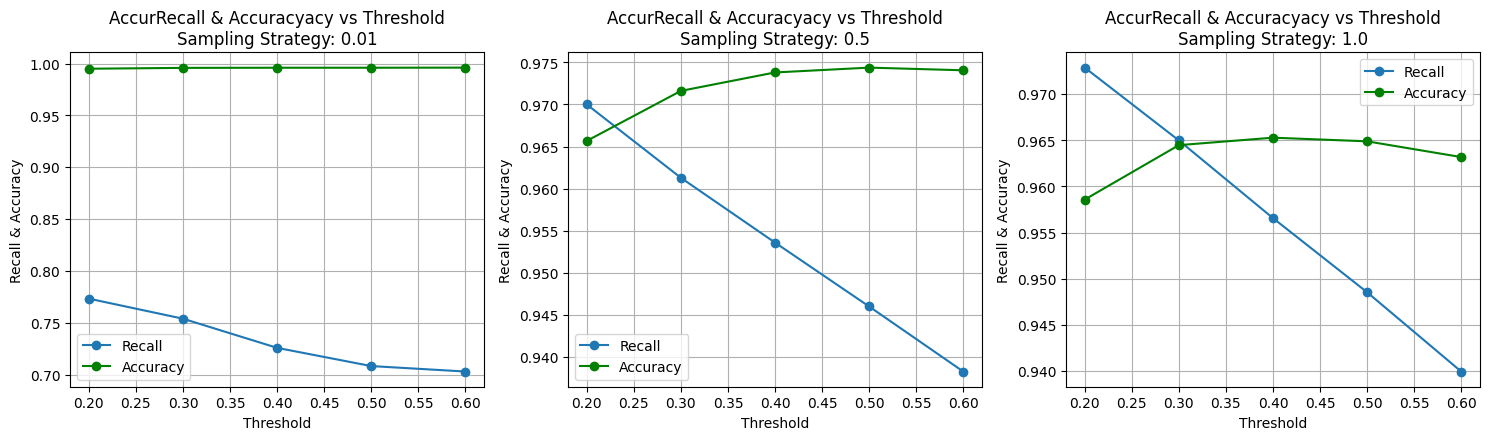

In [42]:
plt.figure(figsize=(15, 8))

for idx, strategy in enumerate(sampling_strategies):
    plt.subplot(2, len(sampling_strategies), idx + 1)
    plt.plot(thresholds, all_recall_scores[idx], marker='o', linestyle='-', label='Recall')


    plt.plot(thresholds, all_accuracy_scores[idx], marker='o', linestyle='-', label='Accuracy', color='g')
    plt.title(f'AccurRecall & Accuracyacy vs Threshold\nSampling Strategy: {strategy}')
    plt.xlabel('Threshold')
    plt.ylabel('Recall & Accuracy')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
693/713 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9807
Epoch 1: val_loss improved from inf to 0.00571, saving model to best_classifier.h5
713/713 [==============================] - 3s 3ms/step - loss: 0.0630 - accuracy: 0.9811 - val_loss: 0.0057 - val_accuracy: 0.9986
Epoch 2/10
 47/713 [>.............................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9974

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


703/713 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9990
Epoch 2: val_loss improved from 0.00571 to 0.00318, saving model to best_classifier.h5
713/713 [==============================] - 3s 4ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/10
710/713 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9993
Epoch 3: val_loss improved from 0.00318 to 0.00297, saving model to best_classifier.h5
713/713 [==============================] - 2s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/10
700/713 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9994
Epoch 4: val_loss improved from 0.00297 to 0.00270, saving model to best_classifier.h5
713/713 [==============================] - 2s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 5/10
713/713 [==============================] - ETA: 0s - loss:

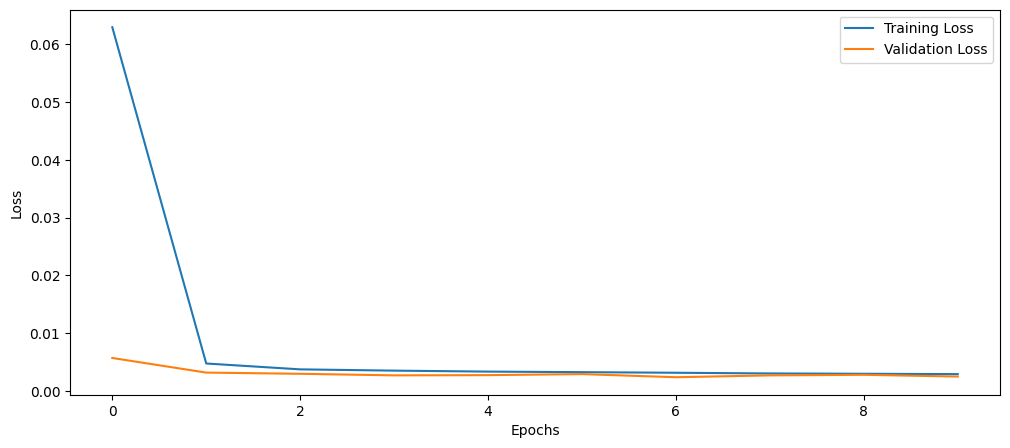


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.63      0.73        98

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



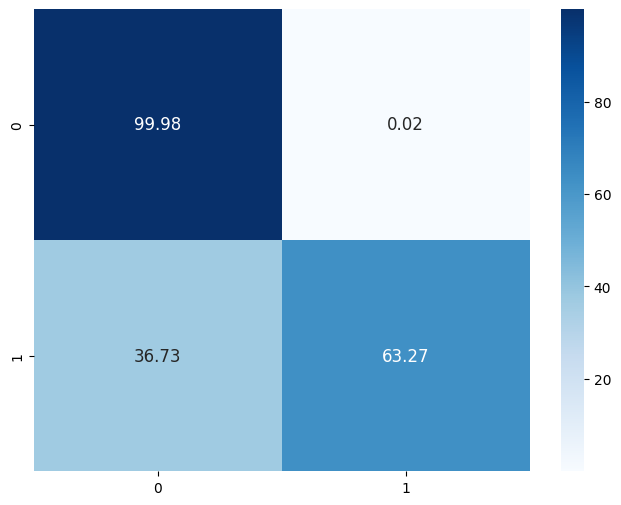

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

noise_factor = 0.1
X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
classifier = Dense(22, activation="relu")(input_layer)
classifier = Dense(15, activation="relu")(classifier)
classifier = Dense(10, activation="relu")(classifier)
classifier = Dense(5, activation="relu")(classifier)
classifier = Dense(2, activation="softmax")(classifier)

classifier_model = Model(inputs=input_layer, outputs=classifier)
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_classifier = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, verbose=1)

history_clf = classifier_model.fit(X_train_noisy, y_train,
                                   epochs=10,
                                   batch_size=256,
                                   shuffle=True,
                                   validation_split=0.2,
                                   callbacks=[ model_checkpoint_classifier])

classifier_model.load_weights('best_classifier.h5')

y_pred = classifier_model.predict(X_test_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)

rscore_1 = r2_score(y_test, y_pred_classes)
print("R2 Score: ", rscore_1)

plt.figure(figsize=(12, 5))
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred_classes)

cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:\n", class_report)